# Health Information Systems and Decision Support Systems
# WPO 5: - CAD Systems (25/03/2022)
***
*Panagiotis Gonidakis, Jakub Ceranka, Joris Wuts, Jef Vandemeulebrouke*<br>
*Department of Electronics and Informatics (ETRO)*<br>
*Vrije Universiteit Brussel, Pleinlaan 2, B-1050 Brussels, Belgium*

<font color=blue>Insert students name and IDs here</font>

### Goal
The goal of this practical session is to get an insight into artificial neural networks and convolutional neural networks. Your tasks will involve examining and preprocessing the data, training various neural networks and validating the performance of your system against the ground-truth predictions done manually by an experienced radiologist. Students must send their notebook, the image files representing the necessary graphs and the report in .ipynb and .html format. The grade from this practical session will contribute to your final grade.

You are kindly requested to submit the <b> .ipynb </b>, an exported <b>.html</b> version  with all the cells properly executed and a <b>.zip</b> file containing all the <b>images</b> displaying the tensorboard training/validating curves </b>(in case are not displayed in the .ipynb).

Please use the Canvas assignment functionality to upload your reports.

The deadline of the submission is in <b> 01/04/2022, 23:59 pm. </b>.

Questions: [pgonidak@etrovub.be](mailto:pgonidak@etrovub.be) and [jceranka@etrovub.be](mailto:jceranka@etrovub.be)

# Libraries
During this practical session, the following libraries will be used:

* Numpy (np)
* Glob
* Simple ITK (sitk)
* Matplotlib
* Sklearn
* Tensorflow (tf)
* Keras (you can also use pytorch if you are more familiar)

To import any external library, you need to import it using the **import** statement followed by the name of the library and the shortcut. You can additionally check for the module version using **version** command. 

* If you use your own laptop, you will need to install new modules.

* These expirements are simplified in order to be run without the need of a powerful GPU. However some training tasks may take 30-40 minutes using a CPU. You can accelerate your expirements if you work on [Google colab](https://colab.research.google.com/) framework where a GPU is offered. Then you need to create a GoogleDrive account and upload all the necessary data (scripts + data). 
For more information look [here](https://colab.research.google.com/) and [here](https://colab.research.google.com/notebooks/gpu.ipynb)

### Tensorflow and Keras (or TFLearn)

TensorFlow (https://www.tensorflow.org/) is an end-to-end open-source platform for machine learning. It’s a comprehensive and flexible ecosystem of tools, libraries and other resources that provide workflows with high-level APIs. The framework offers various levels of concepts for you to choose the one you need to build and deploy machine learning models.

Keras (https://keras.io/), on the other hand, is a high-level neural networks library that is running on the top of TensorFlow. Using Keras in deep learning allows for easy and fast prototyping as well as running seamlessly on CPU and GPU. This framework is written in Python code which is easy to debug and allows ease for extensibility. Keras offers simple and consistent high-level APIs and follows best practices to reduce the cognitive load for the users. Both frameworks provide high-level APIs for building and training models with ease. Keras is built in Python which makes it way more user-friendly than TensorFlow. 

In this exercise, <b>we recommend to use Keras</b> which allows to create/train/test neural networks with very few lines of understandable code. 

Keras (or TFLearn) requires Tensorflow to be installed. Normally, the new versions of keras installs it automatically.

To install keras, open the anaconda prompt and then type:
 ```pip install keras```
    
If not done automatically:
 ```pip install tensorflow``` and after ```pip install tflearn```


Here are some useful resources (installation + documentation):

* https://phoenixnap.com/kb/how-to-install-keras-on-linux <p>
* https://www.tensorflow.org/install <p>
* https://keras.io/getting_started/ <p>
* https://keras.io/api/models/ <p>
* https://keras.io/api/models/sequential/ <p>
    
(*) For the purpose of this exercise, you don't need to use a GPU; tensorflow and keras can be configured to run on a CPU and the most demanding training tasks should not take more than 30min. On the other hand, [colab](https://colab.research.google.com/) offers GPU development environment and the training tasks can really be accelerated.
 
(*) We recommend using tensorflow 2. It is advised to verify which version it is being used before looking for any documentation as the APIs differ.

# Lung Nodule Analysis 
Lung cancer is the leading cause of cancer-related deaths worldwide. Screening high risk individuals for lung cancer with low-dose CT scans is now being implemented in the United States and other countries are expected to follow soon. In CT lung cancer screening, millions of CT scans will have to be analyzed, which is an enormous burden for radiologists. Therefore, there is a lot of interest in development of computer algorithms to optimize cancer screening.

<img src="images/luna16_image.png">

A vital first step in the analysis of lung cancer CT scans is the detection of pulmonary nodules, which may or may not represent early stage lung cancer. Many Computer-Aided Detection (CAD) systems have already been proposed for this task. 

The LIDC/IDRI data set is publicly available, including the ground-truth annotations of nodules performed by four radiologists.

This practical session is inspired from the challenge [LUNA16](https://luna16.grand-challenge.org/home/), which focused on a large-scale evaluation of automatic nodule detection algorithms on the LIDC/IDRI data set.

<img src="images/lung_cancer1.png">


### Using LIDC/IDRI data set in this practical session

For the needs of this practical session, we will look for an algorithm that only determines the likelihood for a given location in a CT scan to contain a pulmonary nodule. Furthermore, we have included a very small part of the LIDC/IDRI data set and we will use only a slice of suspicious regions of a CT scan.

### Data augmentation

Originally our dataset was very unbalanced. There were a lot samples of non-nodules (negatives) but very few samples of nodules (positives). Machine learning algorithms and specifically neural networks and convolutional neural networks require to be trained on balanced dataset, meaning all the classes should be equally represented in the training set. 

Using data augmentation methods (**rotation and translation**), positive samples were massively augmented in order to balance the two classes (nodules and non-nodules)

### Ground Truth data

Categorical data are variables that contain label values rather than numeric values. In our dataset, a sample can represent a nodule or a non-nodule area, so initially we have our ground truth data in a categorical form. Many machine learning algorithms cannot operate on label data directly. They require all input variables to be numeric. This means that categorical data must be converted to a numerical form. This involves two steps:
1. Integer Encoding
2. One-Hot Encoding.

As a first step, each unique category value is assigned an integer value. That's why in our dataset, a sample which represents a nodule will have as a label **1** and a sample which represents a non-nodule area will have as a label **0**.

For our case, this enconding step would be enough since we have only two categories. However, in a more general problem with more than two classes, using this encoding allows the model to assume a natural ordering between categories which may result in poor performance or unexpected results. That's why, one hot encoding can be appled to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value. 

Therefore, a  nodule will be represented by the binary variable [1,0] and a non-nodule area by the binary variable [0,1].

<img src="images/lung_cancer2.png">


# Part 1: Visualize, load and prepare data for Machine Learning Algorithms

CT images are stored in MetaImage (mhd/raw) format. Each .mhd file is stored with as a header file (.mhd) and a corresponding pixeldata file (.raw). To load a CT image, just **load the .mhd header file** and data from the binary .raw file will be automatically loaded.

If you look carefully at the name of each .mhd file, you can extract useful information for a specific sample. You can identify its **number id**, its **size**, if the image was produced by a **data augmentation** method and if it contains a **nodule or not**.

For example: *20046_x0y0z0_20x20x6_r0_1.mhd*
* **20046**:   number of candidate patch
* **x0y0z0**: no translation in any axis (if augmentation is used it is mentioned by the angle in the corresponding axis)
* **20x20x6**: size of the image in voxels
* **r0**:     no rotation
* **1**:      it is a positive sample - represents a nodule
* **.mhd**:   it is a mhd file (this is the file which can be loaded)

### Task 1: Import necessary libraries

Load all necessary libraries using the **import** statement and check for errors.

In [1]:
import numpy as np
import glob
import keras as kf
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,RocCurveDisplay,roc_curve,classification_report
import SimpleITK as sitk
import os

### Task 2: Inspect the dataset

1. Using SimpleITK, create a function to load .mhd files (__Tip:__ The function should return a numpy array - sitk.GetArrayFromImage( ) )
2. Visualize the 6 slices of a chosen patch using matplotlib subplot figure and mention if it is a positive or a negative patch.
3. Visualize some augmented samples from the same candidate region using matplotlib subplot of the same patch and mention the augmentation method. Check visually if the observed patch was modified using the same augmentation method that is mentioned in the samples' filename.
4. Count your files. How many positives and negatives there are in this dataset? (__Tip:__ Use glob library to get the number of specific files in your dataset)

In [2]:
# Code for Part 2: Task 1
def load_itk(filename):
    itkimage = sitk.ReadImage(filename)
    ctImage = sitk.GetArrayFromImage(itkimage)
    origin = np.array(list(reversed(itkimage.GetOrigin())))
    spacing = np.array(list(reversed(itkimage.GetSpacing())))
    return ctImage

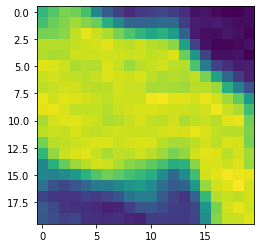

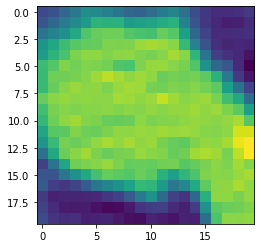

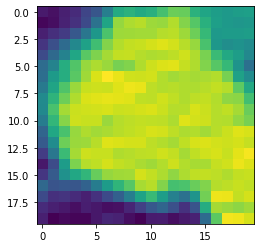

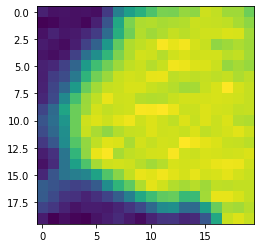

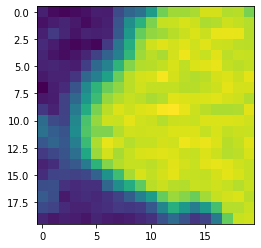

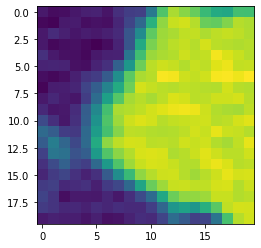

In [6]:
d = load_itk('../WPO5/MiniLunaDataset3/19298_x0y0z0_20x20x6_r0_0.mhd')
for i in d:
    plt.imshow(i)
    plt.show()

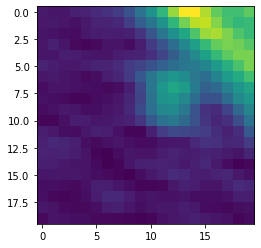

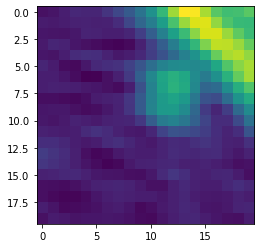

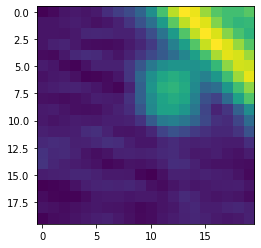

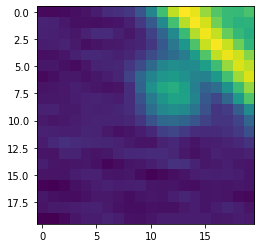

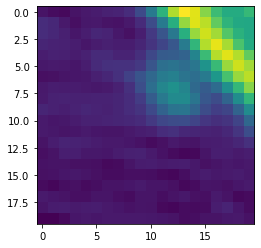

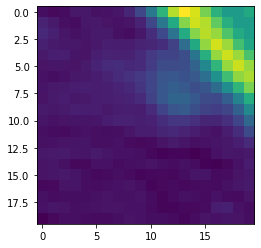

In [4]:
# plot for augmented image
data = load_itk('../WPO5/MiniLunaDataset3/20046_x-1y0z0_20x20x6_q0_1.mhd')
for i in data:
    plt.imshow(i)
    plt.show()

In [7]:
# Check number of positive and negative dataset present
dataDir = '../WPO5/MiniLunaDataset3'
pos,neg = 0,0
for val in os.listdir(dataDir):
    if val.endswith('mhd'):
        l = val.split('_')[-1].split('.')[0]
        if l == '1': pos += 1
        else: neg += 1
print(f'Number of positive and negative dataset present is {pos,neg}')

Number of positive and negative dataset present is (1101, 1214)


### Task 3: Data pre-processing
In order to use neural-networks, we need to pre-process the data and store it in a way which can be easily interpreted by tensorflow.

First of all, separate the test set from the train set. Keep 10% of your samples as a test-set. (**Tip:** Use sklearn **train_test_split** function.)

Since 3D CNNs need a lot of computation power, we will convert our problem to 2D. Instead of using all the 6 CT slices, we will use only the 3rd CT slice. Therefore, from each sample, the 3rd slice wiil be extracted and further preprocessed. In addition, our values currently range from -1024 HU to around 2000 HU. Anything above 400 is not interesting to us, as these are simply bones with different radiodensity. A commonly used set of thresholds to normalize between is -1000 and 400. Finally the labels will be properly encoded to be used for training and testing.

Write your pre-processing tasks as python functions (listed below) and in the end create a pipeline for each sample which will be also implemented as a function.
1. Function loading the .mhd image as a numpy array.
2. Function extracting the 3rd slice of a patch. The final form of patches should be a numpy array of size **20x20** pixels.
3. Function normalizing the dataset.
The unit of measurement in CT scans is the **Hounsfield Unit (HU)**, which is a measure of radiodensity. CT scanners are carefully calibrated to accurately measure this. From Wikipedia:
<img src="images/HU_CTscannersCalibration.png">

    Create a function which is going to normalize the samples according to this table 
        * Create numpy arrays 
        * Normalize between [-1000, 400] using this normalization method 
    $npzarray = (npzarray - minHU) / (maxHU - minHU)$ <br>
         where minHU = -1000 and maxHU = 400
        * After this normalization set any values bigger than 1 to 1 and any values smaller than 0 to 0. 

4. If statement creating **1-hot** labels as a ground truth data in order to train the neural networks. (One-hot labels: [0,1] --> negative, [1,0]--> positive)
 
5. Store into .npy data binary files. (__Tip:__ Use np.save to store data.)


The pipeline should execute the functions as follows: <br>
Load mhd using sitk -> normalize -> Extract 3rd slice -> Label 

and return:
* data:  [sample_idx,20,20]
* labels: [sample_idx,2]

Data pre-processing should be done for both: train and test set.

In [27]:
# Code for Part 1: Task 3
files = [i for i in glob.glob('../WPO5/MiniLunaDataset3/*{}'.format('mhd'))]
def normalize_image(img):
    minHU = -1000
    maxHU = 400
    normalize_image_data= (img - minHU) / (maxHU - minHU)
    normalize_image_data[normalize_image_data>1]=1
    normalize_image_data[normalize_image_data<0]=0
    return normalize_image_data

data = []
labels=[]
for file in files:
    if '_1' in file:
        labels.append([1,0])
    else:
        labels.append([0,1])
    image_array = load_itk(file)
    # extracting the third slice of image
    image_third_slice = image_array[2]
    data.append(normalize_image(image_third_slice))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.10, random_state=42)

In [30]:
np.save("train_data_preprocessed.npy",X_train)
np.save("train_labels_preprocessed.npy",y_train)
np.save("test_data_preprocessed.npy",X_test)
np.save("test_labels_preprocessed.npy",y_test)

In case you are not able to complete part 1, you can move to part 2 of the session by loading the provided .npy files. In that case you will **not** get any credits for Part 1.

# Part 2: Model training and validation

### Using Keras - A High Level API for Tensorflow

Keras introduces a High-Level API that makes neural network building and training fast and easy. This API is intuitive and fully compatible with Tensorflow. In addition, keras provides a plethora of [APIs](https://keras.io/api/models/) and the user may select one that meets his needs. For the purpose of this exercise, the [sequential model](https://keras.io/api/models/sequential/) can be employed. 

When you install TensorFlow and Keras, you automatically also install <b>Tensorboard</b>. During or after training you can use  it  to visualize the network and its performance. <b> For  all the following training tasks you are requested to include the loss and the accuracy graphs for training and also for evaluating the test-set</b>. A simple way to attach these graphs to jupyter notebook is to use Window's Snipping Tool or a similar application. Then display it either using a plain HTML ```<img src>``` or by using ```IPython.display.Image``` and ```IPython.core.display.HTML```. Don't forget to submit the actual image file with your .ipynb as the image is not saved in the notebook, it is just linked. Newer versions tensorboard allow to automatically include these figures in the ipython cells.

### Some Tips:

* Use ```np.load``` to load your data from the previously created .npy binary files.
* Use ```reshape``` method when it is needed to import data to the network.
* Make your own function to create the model for each network architecture to avoid any model conflicts.

* If you trained a model in a past python session, you can load the trained model but first you have to <b>define and initialize it again</b>. 

* Use <b>Tensorbaord</b> to visualize network and performance:
Open the command prompt or the anaconda prompt (or a terminal for linux/iOS) and in the working directory type:
``` $ tensorboard --logdir='...' ```
* You may need to add tensorboard's script to your SYSTEM'S PATH to be able to launch it. 

* <b>If you are using the tensorflow 2 it is possible to run tensorboad using the jupyter notebook. </b>
In a jupyter cell type: ``` %tensorboard --logdir logs ```.
For more information look [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)

* If you have strange keras/tflearn errors, restart the python kernel and <b> re-run only the cells concerning your task you currently work (i.e. run the cells concerning only the current tfmodel). Sometimes you cannot load two different tfmodels at the same python session.</b>.

(*) Depending the version of tflearn/tensorflow you are working some commands might differ. Please look online for recent documentation.

### Some Tensorboard examples.
Here are some examples of a training session. After each task, expand accuracy and loss graphs and attach them in the next cell of the notebook like we did in this exmple.

<img src="screenshots_tensorboard/all_graphs.png">
<img src="screenshots_tensorboard/accuracy_graph.png">
<img src="screenshots_tensorboard/loss_graph.png">

### Task 1: Load Data from the numpy binary files (from Part 1)
Use the numpy load function to load the data created in the previous part of the exercise. The data has to be reshaped in a specific way (see code below) in order to be compatible with the tflearn neural network input standard. After the data is successfully loaded, plot any patch and its ground truth as image title to verify that data is correctly represented.

In [31]:
train_data = np.load("train_data_preprocessed.npy")
train_labels = np.load("train_labels_preprocessed.npy")
test_data = np.load("test_data_preprocessed.npy")
test_labels = np.load("test_labels_preprocessed.npy")


print(train_data.shape)
print(test_data.shape)


X = train_data.reshape(-1,20,20,1)
X_val = test_data.reshape(-1,20,20,1)

(2083, 20, 20)
(232, 20, 20)


### Task 2: Artificial Neural Networks (1 layer)
First, lets train our classifier using an artificial neural network with just one layer, a fully connected one. This layer will have *softmax* as activation function. 

The main advantage of using this activation function is the output range. The range of the outputs will be [0,1] and the sum of all the probabilities will be equal to one. Generally, if the softmax function is used for a  multi-classiication model it returns the probabilities of each class and the target class will have the high probability.

Using TFLearn, define your model. Use these hyperparameters:
* Learning Rate = 1e-4
* Batch Size = 8

Since the network is small, it is not recommended to use Dropout. Train first for 1-2 epochs to verify that everything works and then train for ~10 epochs. Observe the training and evaluate graphs from Tensorboard to decide when to stop training. Copy these graphs to your notebook and explain what happens.

To evaluate the trained model, test it with the test samples and use various performance measures, like <b>confusion matrix</b> for different decision thresholds, <b>precision/recall</b> versus the decision threshold graph and finally plot a **ROC** curve. 

Explain these graphs and the ROC curve. What role does the decision threshold play and why it is so important? Can we have a single value as the decision threshold? Why?

### Tip:
* It is highly recommended to write all the tasks in functions and have as an input argument your tfmodel. Then you will be able to re-use them in the next tasks for different tfmodels.

ANSWER HERE

In [42]:
# Code for Part 2: Task 2
tf.random.set_seed(11)
model_fully_connected_single_layer = kf.Sequential([
    kf.layers.Flatten(),
    kf.layers.Dense(2,activation="softmax")
])

threshold=0.8
log_dir = "logsAneruth"

opt = tf.optimizers.Adam(learning_rate=0.0001)
model_fully_connected_single_layer.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["Accuracy","Precision","Recall"])
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model_fully_connected_single_layer.fit(X,train_labels, epochs=10, batch_size=8, verbose=1, callbacks=[tensorboard_callback],validation_data=(X_val,test_labels))
model_fully_connected_single_layer.summary()

Epoch 1/10
261/261 [==============================] - 2s 4ms/step - loss: 0.6973 - Accuracy: 0.4998 - precision: 0.4998 - recall: 0.4998 - val_loss: 0.6521 - val_Accuracy: 0.6164 - val_precision: 0.6164 - val_recall: 0.6164
Epoch 2/10
261/261 [==============================] - 1s 2ms/step - loss: 0.6443 - Accuracy: 0.5972 - precision: 0.5972 - recall: 0.5972 - val_loss: 0.6109 - val_Accuracy: 0.6336 - val_precision: 0.6336 - val_recall: 0.6336
Epoch 3/10
261/261 [==============================] - 0s 2ms/step - loss: 0.6150 - Accuracy: 0.6495 - precision: 0.6495 - recall: 0.6495 - val_loss: 0.5878 - val_Accuracy: 0.6897 - val_precision: 0.6897 - val_recall: 0.6897
Epoch 4/10
261/261 [==============================] - 0s 2ms/step - loss: 0.5972 - Accuracy: 0.6591 - precision: 0.6591 - recall: 0.6591 - val_loss: 0.5737 - val_Accuracy: 0.6940 - val_precision: 0.6940 - val_recall: 0.6940
Epoch 5/10
261/261 [==============================] - 0s 2ms/step - loss: 0.5851 - Accuracy: 0.6783 - pr

In [44]:
from IPython.display import Image

Image(filename='SingleLayerFFNN_Epoch_Accuracy_Training_Validation.png',width=800, height=400)

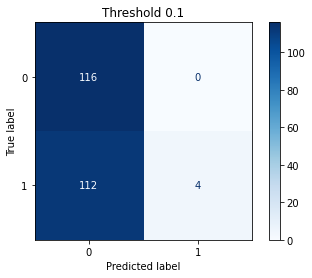

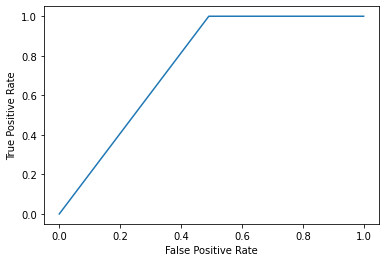

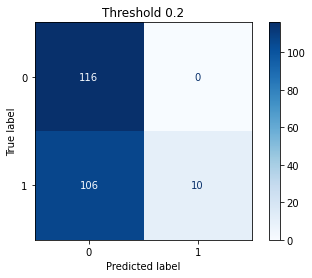

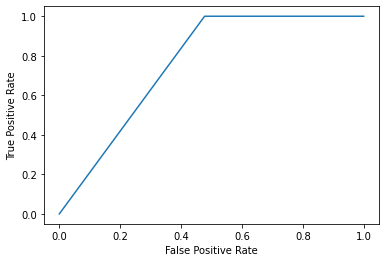

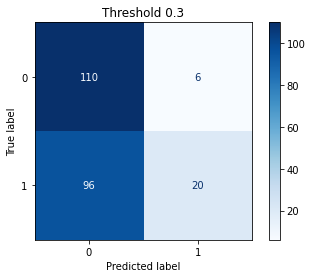

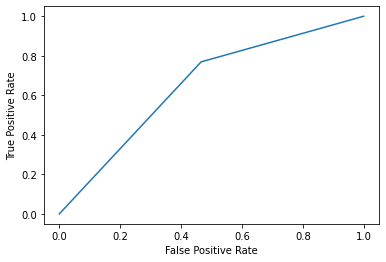

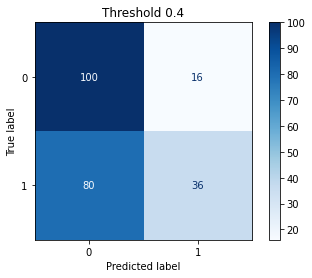

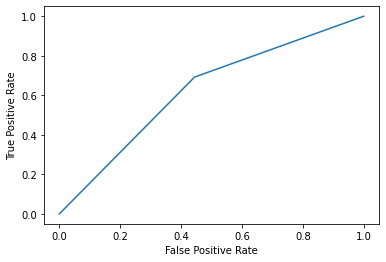

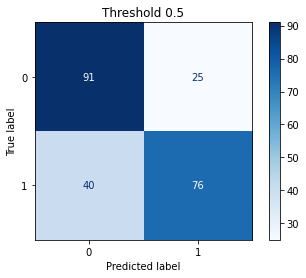

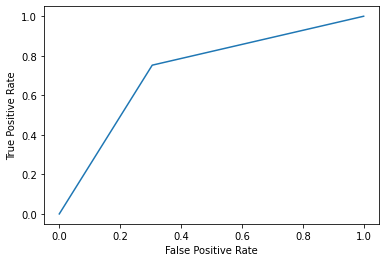

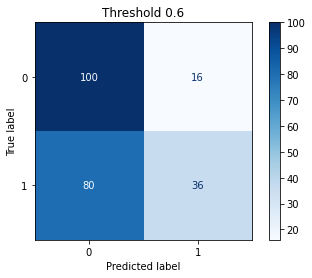

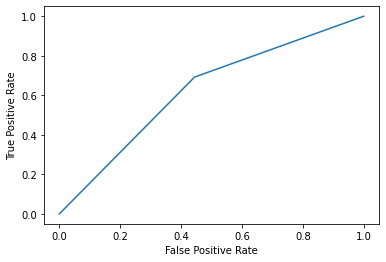

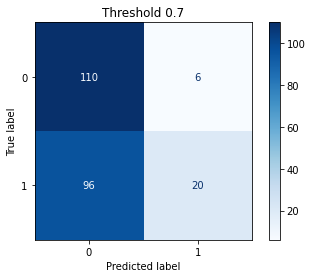

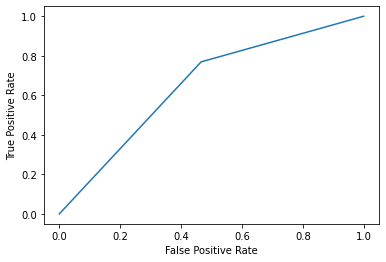

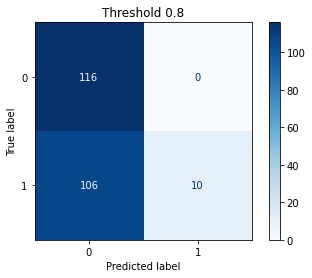

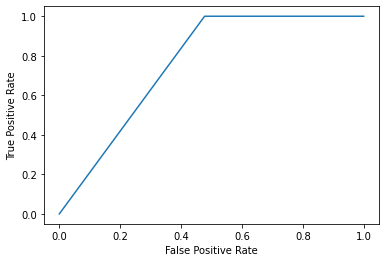

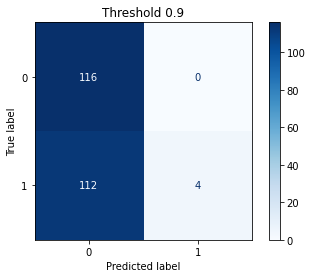

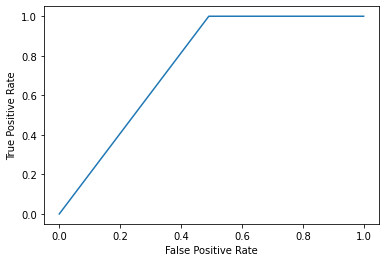

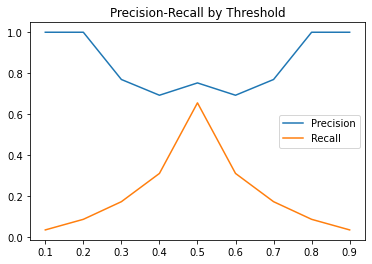

In [46]:
def threshold_predictions(pred,y_true,threshold=0.5):
    num_classes = 2 
    prediction_labels = []
    test_labels_without_encoding = []
    # converting probablistic predictions to one hot encoding
    for i in range(0,len(pred)):
        prediction_numpy = np.zeros(shape=(1,num_classes))
        for label in range(0,num_classes):
            if(pred[i][label]>=threshold):
                prediction_numpy[0][label]=1
        prediction_labels.append(np.argmax(prediction_numpy))
        test_labels_without_encoding.append(np.argmax(y_true[i]))
    return (test_labels_without_encoding,prediction_labels)

predictions = model_fully_connected_single_layer.predict(X_val)

threshold_array = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
precision_array = []
recall_array = []


for i in range(0,len(threshold_array)):
    y_true,y_pred = threshold_predictions(predictions,test_labels,threshold = threshold_array[i])
    precision_array.append(precision_score(y_true,y_pred))
    recall_array.append(recall_score(y_true,y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_true,y_pred))
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Threshold "+str(threshold_array[i]))
    plt.show()
    # Plotting ROC Curve
    # plt.title("ROC Curve")
    fpr, tpr, _ = roc_curve(y_pred, y_true)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.show()


# Plotting precision and recall vs threshold
plt.plot(threshold_array,precision_array,label="Precision")
plt.plot(threshold_array,recall_array,label="Recall")
plt.title("Precision-Recall by Threshold")
plt.legend()
plt.show()

### Task 3: Test the model
Use **predict** method to test a single test sample. Plot the patch and include in the title its ground truth and the prediction. Now, test all the test samples using a for loop and print the accuracy for a decision threshold of 0.5. Additionally, print the **confusion matrix** for the same decision threshold and comment on your findings. Do you think it's necessary to investigate our system's performance by setting different decision thresholds? What performance measurement should we use?

ANSWER HERE

In [47]:
# Code for Part 2: Task 3
test_sample = np.reshape(X_val[0], (1,20,20,1), order='C')

prediction_sample = model_fully_connected_single_layer.predict(test_sample)

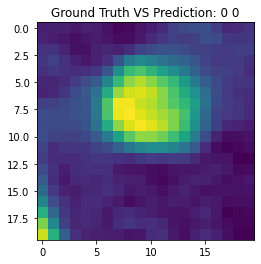

In [48]:
ground_truth = np.argmax(test_labels[0])
predicted_value = np.argmax(prediction_sample)

for img in test_sample:
    plt.imshow(img)
    plt.title("Ground Truth VS Prediction: "+str(ground_truth)+" "+str(predicted_value))
    plt.show()

Print the ROC curve and comment.

ANSWER HERE

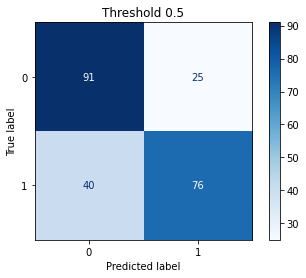

              precision    recall  f1-score   support

           0       0.69      0.78      0.74       116
           1       0.75      0.66      0.70       116

    accuracy                           0.72       232
   macro avg       0.72      0.72      0.72       232
weighted avg       0.72      0.72      0.72       232



In [49]:
# Code for Part 2: Task 3 - ROC
y_true,y_pred = threshold_predictions(predictions,test_labels,threshold = 0.5)
precision_array.append(precision_score(y_true,y_pred))
recall_array.append(recall_score(y_true,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix(y_true,y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title("Threshold 0.5")
plt.show()

print(classification_report(y_true,y_pred))

### Task 4.1: Artificial Neural Networks (3 layers) - Let's go deep!

From now on, we will try various networks. Make sure with every network/parameter change, you update any hyperameters; you test and evaluate the new model with the previously used evaluation metrics (ROC curve, confusion matrix...). Moreover, every time include the tensorboard graphs which describe any new training session (training and validation, losses and accuracy).

Let's try 3 fully-connected layers using **sigmoid** activation function. Choose different values for the learning rate, number of epochs and batch size (e.g. 10, 20, 30...). 

Here is an example network but you are free to choose your own network.
* 1st FC with 80 neurons, sigmoid/relu
* 2nd FC with 40 neurons, sigmoid/relu
* 3rd FC with 2 neurons and softmax
* optimizer: sgd or adam or ...

Explain your network's architecture and **test** your system as you did for the previous simple neural network. What do you observe? Make sure you tune again any hyperparameters like the amount of training epochs. Print some graphs which indicate **underfitting** and **overfitting**. 

In [50]:
# Code for Part 2: Task 4.1
tf.random.set_seed(221)

log_dir = "logs11"

model_fully_connected_three_layer = kf.Sequential([
    kf.layers.Flatten(),
    kf.layers.Dense(80,activation="sigmoid"),
    kf.layers.Dense(40,activation="sigmoid"),
    kf.layers.Dense(2,activation="softmax")
])

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

opt = tf.optimizers.Adam(learning_rate=0.0001)
model_fully_connected_three_layer.compile(loss="categorical_crossentropy", metrics=["Accuracy","Precision","Recall"],optimizer=opt)
model_fully_connected_three_layer.fit(X,train_labels, epochs=10, batch_size=8, verbose=1,callbacks=[tensorboard_callback],validation_data=(X_val,test_labels))
model_fully_connected_three_layer.summary()

Epoch 1/10
261/261 [==============================] - 1s 3ms/step - loss: 0.6724 - Accuracy: 0.6260 - precision: 0.6260 - recall: 0.6260 - val_loss: 0.6488 - val_Accuracy: 0.7457 - val_precision: 0.7457 - val_recall: 0.7457
Epoch 2/10
261/261 [==============================] - 0s 2ms/step - loss: 0.6322 - Accuracy: 0.7259 - precision: 0.7259 - recall: 0.7259 - val_loss: 0.6066 - val_Accuracy: 0.7845 - val_precision: 0.7845 - val_recall: 0.7845
Epoch 3/10
261/261 [==============================] - 0s 2ms/step - loss: 0.5924 - Accuracy: 0.7662 - precision: 0.7662 - recall: 0.7662 - val_loss: 0.5632 - val_Accuracy: 0.7845 - val_precision: 0.7845 - val_recall: 0.7845
Epoch 4/10
261/261 [==============================] - 0s 2ms/step - loss: 0.5528 - Accuracy: 0.7816 - precision: 0.7816 - recall: 0.7816 - val_loss: 0.5238 - val_Accuracy: 0.7759 - val_precision: 0.7759 - val_recall: 0.7759
Epoch 5/10
261/261 [==============================] - 0s 2ms/step - loss: 0.5207 - Accuracy: 0.7816 - pr

In [ ]:
Image(filename='DeepLayerFFNN_Epoch_Accuracy_Training_Validation.png',width=800, height=400)

In [ ]:
Image(filename='DeepLayerFFNN_Epoch_Loss_Training_Validation.png',width=800, height=400)

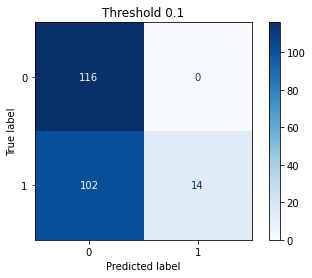

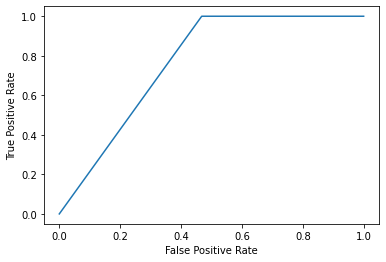

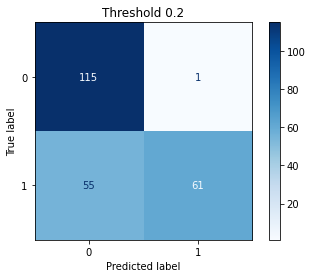

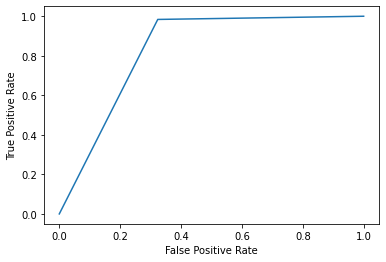

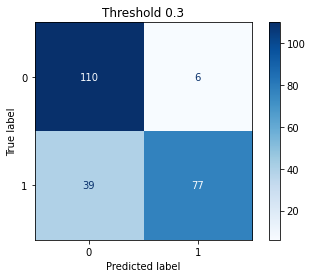

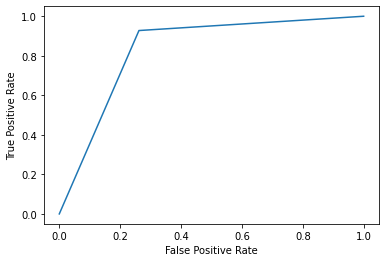

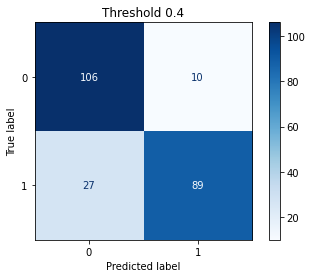

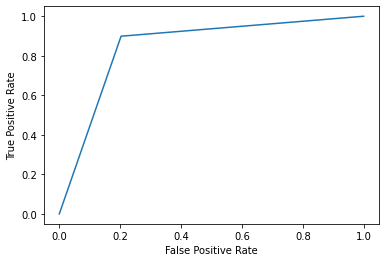

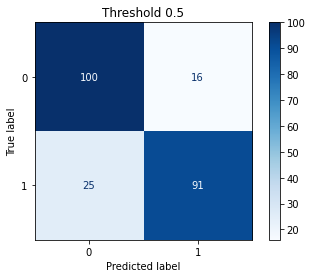

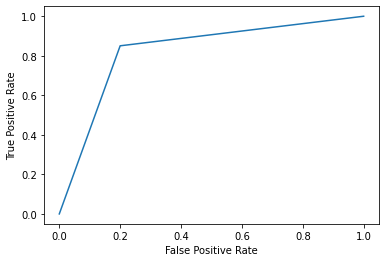

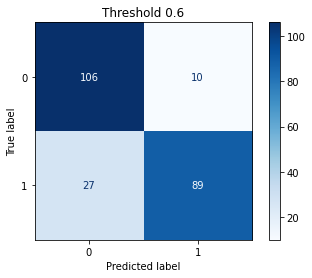

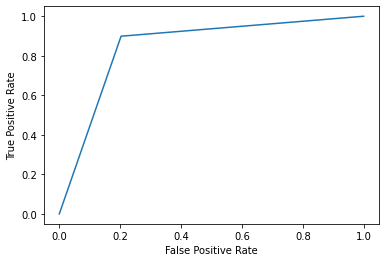

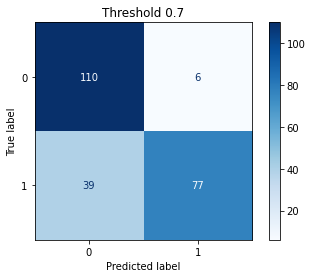

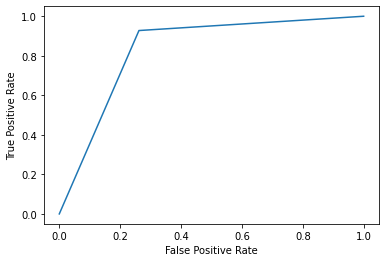

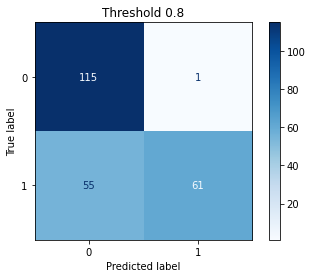

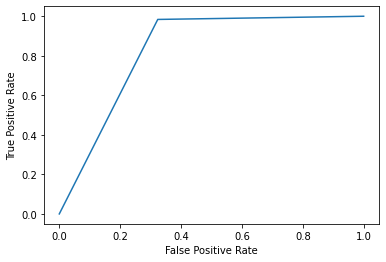

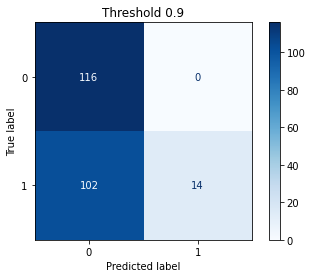

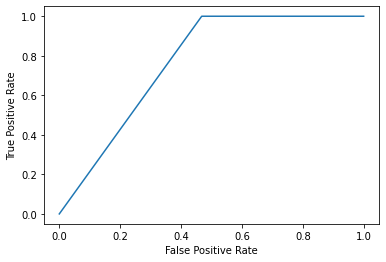

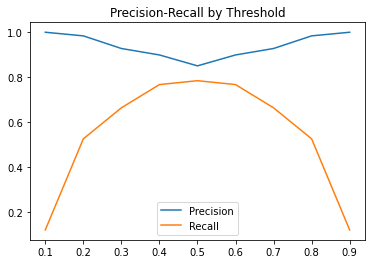

In [51]:
predictions = model_fully_connected_three_layer.predict(X_val)

threshold_array = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
precision_array = []
recall_array = []


for i in range(0,len(threshold_array)):
    y_true,y_pred = threshold_predictions(predictions,test_labels,threshold = threshold_array[i])
    precision_array.append(precision_score(y_true,y_pred))
    recall_array.append(recall_score(y_true,y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_true,y_pred))
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Threshold "+str(threshold_array[i]))
    plt.show()
    # Plotting ROC Curve
    
    fpr, tpr, _ = roc_curve(y_pred, y_true)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.show()


# Plotting precision and recall vs threshold
plt.plot(threshold_array,precision_array,label="Precision")
plt.plot(threshold_array,recall_array,label="Recall")
plt.title("Precision-Recall by Threshold")
plt.legend()
plt.show()

### Task 4.2: Relu!
RELU = Rectified Linear Unit

Let's try the same network but using RELU instead of sigmoid now.

In [52]:
# Code for Part 2: Task 4.2
tf.random.set_seed(221)
log_dir = "logs12"
model_fully_connected_three_layer_relu = kf.Sequential([
    kf.layers.Flatten(),
    kf.layers.Dense(80,activation="relu"),
    kf.layers.Dense(40,activation="relu"),
    kf.layers.Dense(2,activation="softmax")
])

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

opt = tf.optimizers.Adam(learning_rate=0.0001)
model_fully_connected_three_layer_relu.compile(loss="categorical_crossentropy", metrics=["Accuracy","Precision","Recall"],optimizer=opt)
model_fully_connected_three_layer_relu.fit(X,train_labels, epochs=10, batch_size=8, verbose=1,callbacks=[tensorboard_callback],validation_data=(X_val,test_labels))
model_fully_connected_three_layer_relu.summary()

Epoch 1/10
261/261 [==============================] - 1s 3ms/step - loss: 0.6224 - Accuracy: 0.6870 - precision: 0.6870 - recall: 0.6870 - val_loss: 0.5489 - val_Accuracy: 0.7716 - val_precision: 0.7716 - val_recall: 0.7716
Epoch 2/10
261/261 [==============================] - 0s 2ms/step - loss: 0.5224 - Accuracy: 0.8003 - precision: 0.8003 - recall: 0.8003 - val_loss: 0.4595 - val_Accuracy: 0.8534 - val_precision: 0.8534 - val_recall: 0.8534
Epoch 3/10
261/261 [==============================] - 0s 2ms/step - loss: 0.4453 - Accuracy: 0.8627 - precision: 0.8627 - recall: 0.8627 - val_loss: 0.4076 - val_Accuracy: 0.8707 - val_precision: 0.8707 - val_recall: 0.8707
Epoch 4/10
261/261 [==============================] - 1s 2ms/step - loss: 0.3887 - Accuracy: 0.8843 - precision: 0.8843 - recall: 0.8843 - val_loss: 0.3507 - val_Accuracy: 0.8707 - val_precision: 0.8707 - val_recall: 0.8707
Epoch 5/10
261/261 [==============================] - 0s 2ms/step - loss: 0.3442 - Accuracy: 0.8953 - pr

In [ ]:
Image(filename='DeepLayerFFNN_Epoch_Accuracy_Training_Validation_RELU.png',width=800, height=400)

In [ ]:
Image(filename='DeepLayerFFNN_Epoch_Loss_Training_Validation_RELU.png',width=800, height=400)

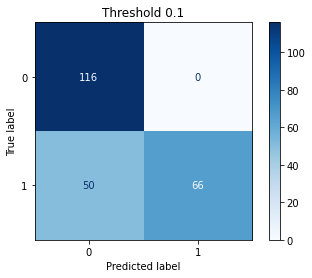

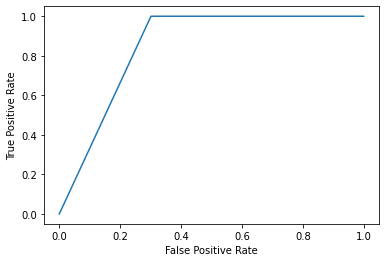

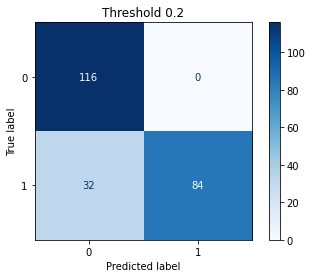

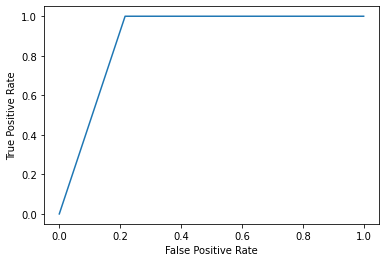

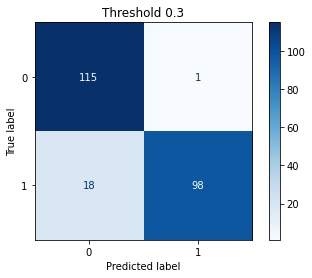

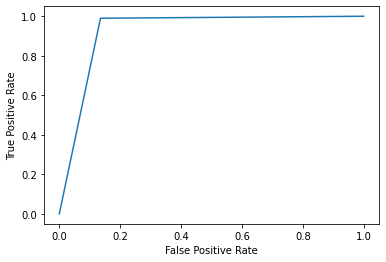

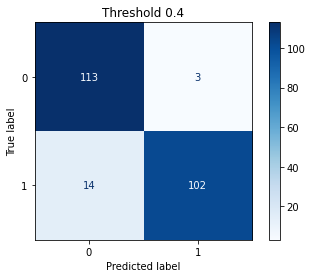

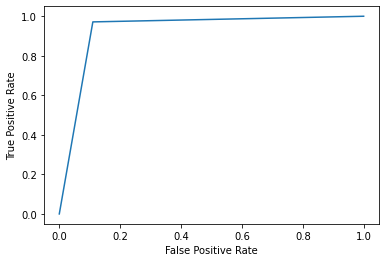

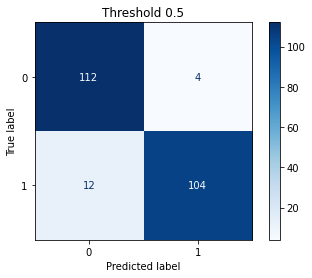

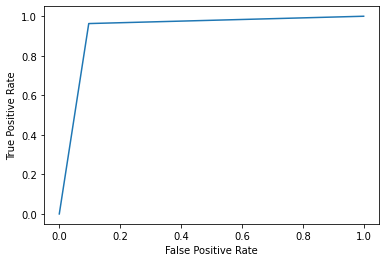

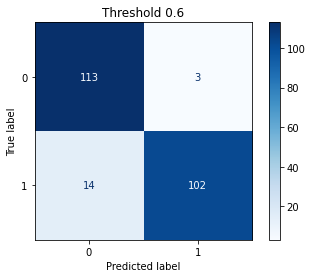

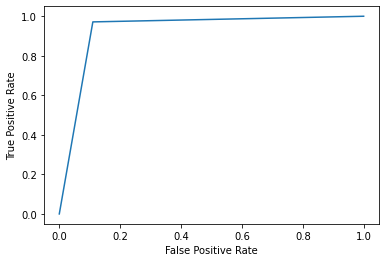

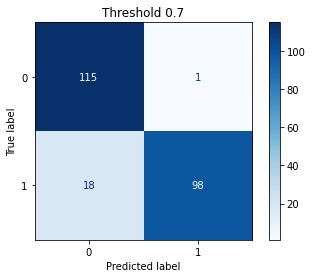

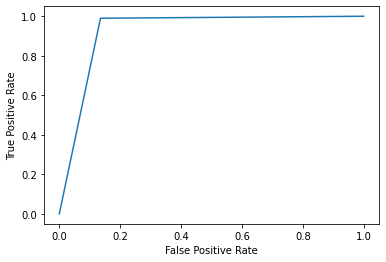

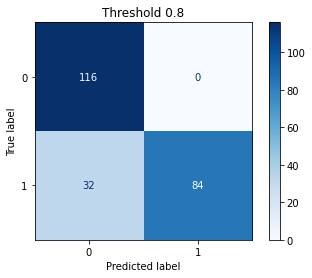

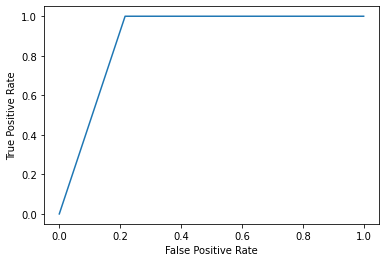

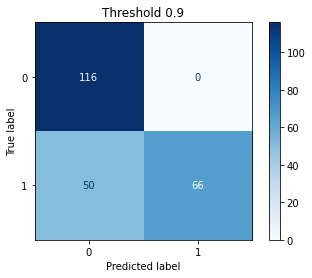

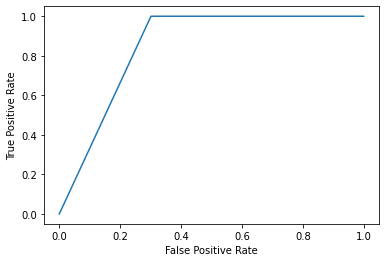

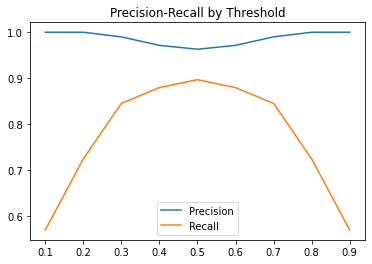

In [53]:
predictions = model_fully_connected_three_layer_relu.predict(X_val)

threshold_array = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
precision_array = []
recall_array = []


for i in range(0,len(threshold_array)):
    y_true,y_pred = threshold_predictions(predictions,test_labels,threshold = threshold_array[i])
    precision_array.append(precision_score(y_true,y_pred))
    recall_array.append(recall_score(y_true,y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_true,y_pred))
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Threshold "+str(threshold_array[i]))
    plt.show()
    # Plotting ROC Curve
    
    fpr, tpr, _ = roc_curve(y_pred, y_true)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.show()


# Plotting precision and recall vs threshold
plt.plot(threshold_array,precision_array,label="Precision")
plt.plot(threshold_array,recall_array,label="Recall")
plt.title("Precision-Recall by Threshold")
plt.legend()
plt.show()

### Task 4.3: Dropout!
Use dropout. Some recommended values to investigate are 0.9, 0.5, 0.1. Explain the results.

ANSWER HERE

In [54]:
# Code for Part 2: Task 4.3
tf.random.set_seed(221)
log_dir = "logs13"
model_fully_connected_three_layer_dropout = kf.Sequential([
    kf.layers.Flatten(),
    
    kf.layers.Dense(80,activation="sigmoid"),
    kf.layers.Dropout(0.9),
    kf.layers.Dense(40,activation="sigmoid"),
    kf.layers.Dense(2,activation="softmax")
])

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

opt = tf.optimizers.Adam(learning_rate=0.0001)
model_fully_connected_three_layer_dropout.compile(loss="categorical_crossentropy", metrics=["Accuracy","Precision","Recall"],optimizer=opt)
model_fully_connected_three_layer_dropout.fit(X,train_labels, epochs=10, batch_size=8, verbose=1,callbacks=[tensorboard_callback],validation_data=(X_val,test_labels))
model_fully_connected_three_layer_dropout.summary()

Epoch 1/10
261/261 [==============================] - 1s 2ms/step - loss: 0.7134 - Accuracy: 0.5161 - precision: 0.5161 - recall: 0.5161 - val_loss: 0.6790 - val_Accuracy: 0.7371 - val_precision: 0.7371 - val_recall: 0.7371
Epoch 2/10
261/261 [==============================] - 0s 2ms/step - loss: 0.6928 - Accuracy: 0.5430 - precision: 0.5430 - recall: 0.5430 - val_loss: 0.6675 - val_Accuracy: 0.7974 - val_precision: 0.7974 - val_recall: 0.7974
Epoch 3/10
261/261 [==============================] - 0s 1ms/step - loss: 0.6921 - Accuracy: 0.5396 - precision: 0.5396 - recall: 0.5396 - val_loss: 0.6584 - val_Accuracy: 0.8103 - val_precision: 0.8103 - val_recall: 0.8103
Epoch 4/10
261/261 [==============================] - 0s 2ms/step - loss: 0.6852 - Accuracy: 0.5588 - precision: 0.5588 - recall: 0.5588 - val_loss: 0.6513 - val_Accuracy: 0.8190 - val_precision: 0.8190 - val_recall: 0.8190
Epoch 5/10
261/261 [==============================] - 0s 2ms/step - loss: 0.6750 - Accuracy: 0.5694 - pr

In [55]:
tf.random.set_seed(221)
log_dir = "logs14"
model_fully_connected_three_layer_dropout = kf.Sequential([
    kf.layers.Flatten(),
    
    kf.layers.Dense(80,activation="sigmoid"),
    kf.layers.Dropout(0.5),
    kf.layers.Dense(40,activation="sigmoid"),
    kf.layers.Dense(2,activation="softmax")
])

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

opt = tf.optimizers.Adam(learning_rate=0.0001)
model_fully_connected_three_layer_dropout.compile(loss="categorical_crossentropy", metrics=["Accuracy","Precision","Recall"],optimizer=opt)
model_fully_connected_three_layer_dropout.fit(X,train_labels, epochs=10, batch_size=8, verbose=1,callbacks=[tensorboard_callback],validation_data=(X_val,test_labels))
model_fully_connected_three_layer_dropout.summary()

Epoch 1/10
261/261 [==============================] - 1s 3ms/step - loss: 0.6845 - Accuracy: 0.5578 - precision: 0.5578 - recall: 0.5578 - val_loss: 0.6597 - val_Accuracy: 0.7586 - val_precision: 0.7586 - val_recall: 0.7586
Epoch 2/10
261/261 [==============================] - 0s 2ms/step - loss: 0.6546 - Accuracy: 0.6471 - precision: 0.6471 - recall: 0.6471 - val_loss: 0.6310 - val_Accuracy: 0.7974 - val_precision: 0.7974 - val_recall: 0.7974
Epoch 3/10
261/261 [==============================] - 0s 1ms/step - loss: 0.6350 - Accuracy: 0.6764 - precision: 0.6764 - recall: 0.6764 - val_loss: 0.6031 - val_Accuracy: 0.7845 - val_precision: 0.7845 - val_recall: 0.7845
Epoch 4/10
261/261 [==============================] - 0s 2ms/step - loss: 0.6057 - Accuracy: 0.7100 - precision: 0.7100 - recall: 0.7100 - val_loss: 0.5719 - val_Accuracy: 0.7759 - val_precision: 0.7759 - val_recall: 0.7759
Epoch 5/10
261/261 [==============================] - 0s 2ms/step - loss: 0.5786 - Accuracy: 0.7451 - pr

In [56]:
tf.random.set_seed(221)
log_dir = "logs15"
model_fully_connected_three_layer_dropout = kf.Sequential([
    kf.layers.Flatten(),
    
    kf.layers.Dense(80,activation="sigmoid"),
    kf.layers.Dropout(0.1),
    kf.layers.Dense(40,activation="sigmoid"),
    kf.layers.Dense(2,activation="softmax")
])

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

opt = tf.optimizers.Adam(learning_rate=0.0001)
model_fully_connected_three_layer_dropout.compile(loss="categorical_crossentropy", metrics=["Accuracy","Precision","Recall"],optimizer=opt)
model_fully_connected_three_layer_dropout.fit(X,train_labels, epochs=10, batch_size=8, verbose=1,callbacks=[tensorboard_callback],validation_data=(X_val,test_labels))
model_fully_connected_three_layer_dropout.summary()

Epoch 1/10
261/261 [==============================] - 1s 3ms/step - loss: 0.6755 - Accuracy: 0.6116 - precision: 0.6116 - recall: 0.6116 - val_loss: 0.6507 - val_Accuracy: 0.7328 - val_precision: 0.7328 - val_recall: 0.7328
Epoch 2/10
261/261 [==============================] - 1s 2ms/step - loss: 0.6362 - Accuracy: 0.7216 - precision: 0.7216 - recall: 0.7216 - val_loss: 0.6109 - val_Accuracy: 0.7888 - val_precision: 0.7888 - val_recall: 0.7888
Epoch 3/10
261/261 [==============================] - 0s 2ms/step - loss: 0.6001 - Accuracy: 0.7566 - precision: 0.7566 - recall: 0.7566 - val_loss: 0.5700 - val_Accuracy: 0.7802 - val_precision: 0.7802 - val_recall: 0.7802
Epoch 4/10
261/261 [==============================] - 0s 2ms/step - loss: 0.5619 - Accuracy: 0.7739 - precision: 0.7739 - recall: 0.7739 - val_loss: 0.5312 - val_Accuracy: 0.7716 - val_precision: 0.7716 - val_recall: 0.7716
Epoch 5/10
261/261 [==============================] - 0s 2ms/step - loss: 0.5294 - Accuracy: 0.7792 - pr

### Task 5. A Convolutional Neural Network

#### Model definition

input -> conv1 -> pool1 -> conv2 -> fc1 -> fc2 -> softmax
* convolution layers: kernel size = 3x3, number of channels = 64, activation function = sigmoid
* max-pooling layers: kernel size = 2x2, strides = 2
* 1st fully connected: 50 neurons, activation function = sigmoid
* 2nd fully connected: 2 neurons, activation function = softmax
* optimizer = sgd / adam
* use dropout (e.g. 0.5)

Like before, measure system's prerfomance and explain.

In [57]:
# Code for Part 2: Task 5
tf.random.set_seed(221)
model_cnn = kf.Sequential([
   
    kf.layers.Conv2D(64,(3,3),activation="sigmoid",input_shape=(20,20,1)),
    kf.layers.Dropout(0.5),
    kf.layers.MaxPool2D(pool_size=(2,2),strides=2),
    kf.layers.Conv2D(64,kernel_size=(3,3),activation="sigmoid"),
    kf.layers.Dropout(0.5),
    kf.layers.Flatten(),
    kf.layers.Dense(50,activation="sigmoid"),
    kf.layers.Dense(2,activation="softmax")
])

log_dir = "logs16"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

opt = tf.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(loss="categorical_crossentropy", metrics=["Accuracy","Precision","Recall"],optimizer=opt)
model_cnn.fit(X,train_labels, epochs=10, batch_size=8, verbose=1,callbacks=[tensorboard_callback],validation_data=(X_val,test_labels))
model_cnn.summary()

Epoch 1/10
261/261 [==============================] - 3s 8ms/step - loss: 0.7172 - Accuracy: 0.4772 - precision: 0.4772 - recall: 0.4772 - val_loss: 0.7149 - val_Accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 2/10
261/261 [==============================] - 2s 7ms/step - loss: 0.7012 - Accuracy: 0.5122 - precision: 0.5122 - recall: 0.5122 - val_loss: 0.6949 - val_Accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 3/10
261/261 [==============================] - 2s 6ms/step - loss: 0.6922 - Accuracy: 0.5252 - precision: 0.5252 - recall: 0.5252 - val_loss: 0.6934 - val_Accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 4/10
261/261 [==============================] - 2s 6ms/step - loss: 0.6898 - Accuracy: 0.5386 - precision: 0.5386 - recall: 0.5386 - val_loss: 0.7026 - val_Accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 5/10
261/261 [==============================] - 2s 6ms/step - loss: 0.6659 - Accuracy: 0.5982 - pr

### Task 6. A Deeper Convolutional Neural Network

#### Model definition

input -> conv1 -> pool1 -> conv2 -> conv3 -> fc1 -> fc2 -> softmax
* convolution layers: kernel size = 5x5, number of channels = 64, activation function = relu
* max-pooling layers: kernel size = 2x2, strides = 2
* 1st fully connected: 100 neurons, activation function = relu
* 2nd fully connected: 2 neurons, activation function = softmax
* optimizer = sgd / adam
* use dropout (e.g. 0.5)

Like before, measure system's prerfomance and explain.

In [58]:
# Code for Part 2: Task 6
tf.random.set_seed(221)

log_dir = "logs17"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model_cnn_deep = kf.Sequential([
   
    kf.layers.Conv2D(64,(5,5),activation="relu",input_shape=(20,20,1)),
    kf.layers.Dropout(0.5),
    kf.layers.MaxPool2D(pool_size=(2,2),strides=2),
    kf.layers.Conv2D(64,kernel_size=(5,5),activation="relu",padding="same"),
    kf.layers.Conv2D(64,kernel_size=(5,5),activation="relu"),
    kf.layers.MaxPool2D(pool_size=(2,2),strides=2),
    kf.layers.Dropout(0.5),
    kf.layers.Flatten(),
    kf.layers.Dense(50,activation="sigmoid"),
    kf.layers.Dense(2,activation="softmax")
])

opt = tf.optimizers.Adam(learning_rate=0.0001)
model_cnn_deep.compile(loss="categorical_crossentropy", metrics=["Accuracy","Precision","Recall"],optimizer=opt)
model_cnn_deep.fit(X,train_labels, epochs=10, batch_size=8, verbose=1,callbacks=[tensorboard_callback],validation_data=(X_val,test_labels))
model_cnn_deep.summary()

Epoch 1/10
261/261 [==============================] - 4s 12ms/step - loss: 0.5898 - Accuracy: 0.7398 - precision: 0.7398 - recall: 0.7398 - val_loss: 0.5607 - val_Accuracy: 0.6853 - val_precision: 0.6853 - val_recall: 0.6853
Epoch 2/10
261/261 [==============================] - 3s 10ms/step - loss: 0.4458 - Accuracy: 0.8070 - precision: 0.8070 - recall: 0.8070 - val_loss: 0.4003 - val_Accuracy: 0.8233 - val_precision: 0.8233 - val_recall: 0.8233
Epoch 3/10
261/261 [==============================] - 2s 10ms/step - loss: 0.3643 - Accuracy: 0.8382 - precision: 0.8382 - recall: 0.8382 - val_loss: 0.3555 - val_Accuracy: 0.8534 - val_precision: 0.8534 - val_recall: 0.8534
Epoch 4/10
261/261 [==============================] - 2s 9ms/step - loss: 0.3192 - Accuracy: 0.8661 - precision: 0.8661 - recall: 0.8661 - val_loss: 0.3572 - val_Accuracy: 0.8147 - val_precision: 0.8147 - val_recall: 0.8147
Epoch 5/10
261/261 [==============================] - 2s 9ms/step - loss: 0.2901 - Accuracy: 0.8905 -

### (BONUS) Create your own convolution neural network

Create your own network and try to increase model's accuracy. You can use different:
* size of convolutional kernels
* activation functions
* optimizers ...
***

* **Extra task**: Select a different part of the dataset as test-set and repeat the training tasks

In [ ]:
# Code for BONUS part